# Wrangle and analyze data
Welcome! This project consist on gathering, asessing, cleaning, and reporting information about a particular Twitter acount called **We rate dogs**. We will gather information like the text of the tweets, the date, twitter interactions (retweets, favorites, etc) among others. It turns out that most of the tweets from this acounts are based on images. There is a dataframe available with predictions based on neural networks about the breed of the dogs in the images. We also have information about the age of the dog: doggo, floofer, pupper or puppo. We would like to analyse the behavior of the ratings acording to the dog's breed and age. We would also like to find out a relation between age and breeds that are present in the tweets.

# Gathering the data
Let us first import all the libraries we will need for the project

In [1]:
import requests
import os
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline

Let us get the three datasets. The first one is provided to us, then we call it with the **read_csv** function.

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

The second is provided to us via an url. We need to use the requests libray according to what we learned in the class.

In [3]:
folder_name= 'breed_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

Above we have got the file uploaded in a folder. Now we need to read it. Since this file's format is tsv, we need to declare the separator equal to the 'tab' command.

In [5]:
df2=pd.read_csv('breed_prediction/image-predictions.tsv', sep='\t')

Next cell contains the code to query the Twitter's API (It is copied here as required by the rubric, but we actually didn't create a Twitter account). 

Note: it is commented out so the whole notebook can run without errors.

In [6]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In order to get the third dataset, we read it line by line and use the column names to populating the dataframe line by line. The format of this file is .json.

In [7]:
df3= pd.DataFrame(columns=['tweet id', 'retweet count', 'favorite count'])


In [8]:
with open('tweet_json.txt') as json_file:
    for line in json_file:
        jfile = json.loads(line)
        tweet_id = jfile['id']
        retweet_count = jfile['retweet_count']
        favorite_count = jfile['favorite_count']
        #favourited = jfile['favorited']
        #retweeted = jfile['retweeted']
        #followers = jfile['user']['followers_count']
        #friends = jfile['user']['friends_count']
        
        df3 = df3.append({'tweet id':tweet_id, 
                          'retweet count':retweet_count, 
                          'favorite count':favorite_count},
                            ignore_index=True)

Let us take a look af the dataframes' heads.

In [9]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df3.head()

,tweet id,retweet count,favorite count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assesing data
First we will asses the datasets for quality issues and later for tidiness issues.
## Quality
### Visual assesing
After visualizing the three datasets, we can find the following eight issues for improving the quality of the data
1. The first dataframe contains lots of missing values in the columns retweeted_status_user_id, 'in_reply_to_user_id'.
- In the second dataframe, the columns 'p1', 'p2' and 'p3' containing dog breeds have a combination of uppercase and lowercase entries. This could be unconvenient cause it would lead to unnecessary repetitions.

### Programmatic assesment
3. The function **df1['name'].value_counts()** (see below) makes us notice that 745 entries say 'None' ans 55 entries say 'a', which does not seem like a reasonable name for a pet.

In [12]:
df1['name'].value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

4. The function **df2['p1'].value_counts().tail()** (see below) makes us notice that there are entries that should be dog breeds and are not, such as 'hotdog' or 'bookshop'.

In [13]:
df2['p1'].value_counts().tail(10)

ibex                   1
American_black_bear    1
coffee_mug             1
mortarboard            1
washer                 1
bookcase               1
sliding_door           1
grille                 1
leaf_beetle            1
banana                 1
Name: p1, dtype: int64

5. The function **info()** shows us that the datatype of **'tweet_id'** is integer for the first 2 dataframes. The datatype should be string, cause we do not pretend to make comparisons or operations with id.

In [14]:
print(df1.info())
print('--------------------------------')
print(df2.info())
print('--------------------------------')
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

6. The entries 'retweet count' and 'favourite count' from the third dataframe are numbers. However, the function **df3.info()** (see below) tells us that these datatypes are object.

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet id          2354 non-null object
retweet count     2354 non-null object
favorite count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


7. The function **df1['rating_numerator'].describe()** tells us that the maximum value is 1776, which looks like an extremely big outlier. Even in therms of quotiens, given that the maximum denominator is 170 as seen later.

In [16]:
df1['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

8. The function **df1['rating_denominator'].describe()** makes us notice that the minimum value is zero. But we can not divide by zero!

In [17]:
df1['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

## Tidiness
A visual assesment of the dataframes makes us notice two tidiness issues:
1. In the first dataframe there is one column for each kind fo dog: doggo, floofer, pupper and puppo. For each item, there is only one choice among these four kinds. Therefore, this information should be displayed in one only column.
2. There are two dataframes combining retweets issues. Namely, the first dataframe has the columns ''retweeted_status_id' and 'retweeted_status_user_id', and the the third dataframe has the column 'retweet count'. Moreover, the three datasets are related with the tweets information. Therefore we should have one **Master dataset** including all the needed information for the analysis.

# Cleaning data (Quality)
Let us start the cleanning process! First we create copies of the three datasets, so that we do not loose original information during the process.

In [18]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### 1.  -------------------------------------------------------------------------------------------
**Issue: _The first dataframe contains lots of missing values in the columns 'in reply to status', 'in reply to user id' among others_**

#### Define
On the one hand, the columns 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp', and 'expanded_urls' containing missing values are not relevant for our study.  We may drop this columns from dataset 1. 

On the other hand, we only want original tweets, not retweeted or replies, **we only keep the rows** where 'in_reply_to_satus_id' and 'in_reply_to_status' are null. Then we take away this columns cause they don't provide us with any information.

#### Code



In [19]:
# Dropping 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'
df1_clean=df1_clean.drop(['in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

In [20]:
# keeping only tweets not being retweets or replies
df1_clean=df1_clean[df1_clean['in_reply_to_status_id'].isnull()==True]
df1_clean=df1_clean[df1_clean['retweeted_status_id'].isnull()==True]

In [21]:
# Dropping reply status and retweet status, cause now they are all null!
df1_clean=df1_clean.drop(['in_reply_to_status_id','retweeted_status_id'], axis=1)

#### Test
We can notice that the new dataframe does not have missing values.

In [22]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### 2.--------------------------------------------------------------------------------------
**_In the second dataframe, the columns 'p1', 'p2' and 'p3' containing dog breeds have a combination of uppercase and lowercase entries. This could be unconvenient cause it would lead to unnecessary repetitions._**

#### Define
We use the function **lower** for avoiding the uppercased entries in the columns 'p1', 'p2' and 'p3'.

#### Code

In [23]:
df2_clean['p1']=df2_clean['p1'].str.lower()
df2_clean['p2']=df2_clean['p2'].str.lower()
df2_clean['p3']=df2_clean['p3'].str.lower()

#### Test 
We can see below that the three columns are now lowercased.

In [24]:
df2_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3.--------------------------------------------------------------------------------------------
**Issue: _The function df1['name'].value counts() makes us notice that 745 entries say 'None' ans 55 entries say 'a', which does not seem like a reasonable name for a pet._**

#### Define
We will replace the 'None' and 'a' entries by the string 'unknown', in order to indicate that the name is not registered.


In [25]:
df1_clean['name'] = df1_clean['name'].fillna('unknown').apply(lambda x: 'unknown' if (x =='a' or x == 'None') else x)

#### Test
Now we verify that 'None' and 'a' are fusioned into the category 'unknown'

In [26]:
df1_clean['name'].value_counts()

unknown      658
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
the            8
Lola           8
Sadie          8
Daisy          7
Toby           7
Jax            6
Bo             6
Koda           6
Bella          6
Stanley        6
Oscar          6
an             6
Bailey         6
Buddy          5
Louis          5
Chester        5
Milo           5
Scout          5
Dave           5
Leo            5
Bentley        5
Rusty          5
            ... 
Carper         1
Ridley         1
Hanz           1
Sprout         1
Horace         1
Rolf           1
Jebberson      1
Apollo         1
Kenzie         1
Milky          1
Mairi          1
Stefan         1
Dale           1
Mack           1
Reptar         1
Chelsea        1
Duddles        1
Crouton        1
Zeus           1
Gert           1
Beebop         1
Rilo           1
Rumble         1
Pete           1
Snickers       1
Dixie          1
Chase          1
Pubert        

### 4.----------------------------------------------------------------------------------------
**_The function df2['p1'].value_counts().tail() (see below) makes us notice that there are entries that should be dog breeds and are not, such as 'hotdog' or 'school_bus'_**

#### Define
We will extact from Wikipedia a list of dog breeds using **requests** and **BeautifulSoup**. Then, we will replace the elements in the 'p1', 'p2' and 'p3' columns which are not in the list by the string 'unknown'.

#### Code


In [27]:
url='https://en.wikipedia.org/wiki/List_of_dog_breeds'
response=requests.get(url)

In [28]:
with open('List_of_dog_breeds.html',mode='wb') as file:
    file.write(response.content)

In [29]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of dog breeds - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ae9e59f3-a2aa-4f01-8bad-8500e346dbbf","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_dog_breeds","wgTitle":"List of dog breeds","wgCurRevisionId":1030574440,"wgRevisionId":1030574440,"wgArticleId":8615,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Harv and Sfn no-target errors","Articles with short description","Short description is different from Wikidata","CS1 Persian-language sources (fa)",

In [30]:
with open('List_of_dog_breeds.html') as file:
    soup=BeautifulSoup(file,'lxml')

According to the BeautifulSoup documentation and after taking a look at the html content above, we note that the breed names are contained in **<a** items and are named by **title=**


In [31]:
#populating a list  with the titles found between <a a> items
#taking into account that we need lowercased names and undescore between words.
Titles=[]
for breed in soup.find_all('a'):
    n=breed.get('title')
    if str(n)!='None':
        Titles.append(str(n).lower().replace('(dog)','').strip().replace(' ','_'))

In [32]:
Titles

['enlarge',
 'dog_breed',
 'extinction',
 'edit_section:_extant_breeds',
 'edit_section:_a–c',
 'affenpinscher',
 'afghan_hound',
 'aidi',
 'airedale_terrier',
 'akbash',
 'akita',
 'aksaray_malaklisi',
 'alano_español',
 'alapaha_blue_blood_bulldog',
 'sled_dog',
 'alaskan_klee_kai',
 'alaskan_malamute',
 'alopekis',
 'alpine_dachsbracke',
 'american_bulldog',
 'american_bully',
 'american_cocker_spaniel',
 'american_english_coonhound',
 'american_eskimo_dog',
 'american_foxhound',
 'american_hairless_terrier',
 'american_pit_bull_terrier',
 'american_staffordshire_terrier',
 'american_water_spaniel',
 'andalusian_hound',
 'anglo-français_de_petite_vénerie',
 'appenzeller_sennenhund',
 'ariegeois',
 'armant',
 'armenian_gampr_dog',
 'artois_hound',
 'australian_cattle_dog',
 'australian_kelpie',
 'australian_shepherd',
 'australian_stumpy_tail_cattle_dog',
 'australian_terrier',
 'austrian_black_and_tan_hound',
 'austrian_pinscher',
 'azawakh',
 'bakharwal_dog',
 'banjara_hound',
 'ba

After printing all the titles we got, we notice that the first titles are noise from the webpage and at the end there is also a los of noisy titles. Hence, we need to findout the interval containing the real breed names.

In [33]:
#Get the index of the first breed 'affenpinscher' and the last breed 'yorkshire_terrier'
print(Titles.index('affenpinscher'))
print(Titles.index('yorkshire_terrier'))

5
512


In [34]:
# delimiting the list above
Breeds = Titles[5:513]
Breeds

['affenpinscher',
 'afghan_hound',
 'aidi',
 'airedale_terrier',
 'akbash',
 'akita',
 'aksaray_malaklisi',
 'alano_español',
 'alapaha_blue_blood_bulldog',
 'sled_dog',
 'alaskan_klee_kai',
 'alaskan_malamute',
 'alopekis',
 'alpine_dachsbracke',
 'american_bulldog',
 'american_bully',
 'american_cocker_spaniel',
 'american_english_coonhound',
 'american_eskimo_dog',
 'american_foxhound',
 'american_hairless_terrier',
 'american_pit_bull_terrier',
 'american_staffordshire_terrier',
 'american_water_spaniel',
 'andalusian_hound',
 'anglo-français_de_petite_vénerie',
 'appenzeller_sennenhund',
 'ariegeois',
 'armant',
 'armenian_gampr_dog',
 'artois_hound',
 'australian_cattle_dog',
 'australian_kelpie',
 'australian_shepherd',
 'australian_stumpy_tail_cattle_dog',
 'australian_terrier',
 'austrian_black_and_tan_hound',
 'austrian_pinscher',
 'azawakh',
 'bakharwal_dog',
 'banjara_hound',
 'barbado_da_terceira',
 'barbet',
 'basenji',
 'basque_shepherd_dog',
 'basset_artésien_normand',


In [35]:
[x for x in set(df2_clean['p1']) if x not in Breeds]

['grille',
 'patio',
 'mousetrap',
 'minibus',
 'carton',
 'tiger_shark',
 'standard_poodle',
 'grey_fox',
 'coil',
 'water_buffalo',
 'china_cabinet',
 'loafer',
 'arctic_fox',
 'badger',
 'suit',
 'fountain',
 'refrigerator',
 'marmot',
 'bath_towel',
 'platypus',
 'clumber',
 'maze',
 'toilet_tissue',
 'barbell',
 'pekinese',
 'rain_barrel',
 'ostrich',
 'jersey',
 'sandbar',
 'agama',
 'binoculars',
 'cairn',
 'hyena',
 'ibex',
 'otter',
 'wild_boar',
 'bow_tie',
 'curly-coated_retriever',
 'guinea_pig',
 'toy_poodle',
 'birdhouse',
 'shower_curtain',
 'boathouse',
 'german_short-haired_pointer',
 'gas_pump',
 'killer_whale',
 'coho',
 'fire_engine',
 'window_shade',
 'swing',
 'toy_terrier',
 'geyser',
 'groenendael',
 'seashore',
 'frilled_lizard',
 'hen',
 'shopping_basket',
 'upright',
 'wombat',
 'ice_lolly',
 'lynx',
 'african_hunting_dog',
 'bighorn',
 'miniature_poodle',
 'panpipe',
 'sundial',
 'redbone',
 'remote_control',
 'hotdog',
 'dough',
 'bull_mastiff',
 'tailed_fr

After printing the entries in 'p1' not containing in the breeds list, we notice that a few of them are still dog breeds, due to misspelling like 'doberman' or other issues that could only be solved by a manual process.

In [36]:
df2_clean['p1']= df2_clean['p1'].apply(lambda x: x if x in Breeds else 'unknown')

Now we do the same for 'p1' and 'p2'

In [37]:
df2_clean['p2']= df2_clean['p2'].apply(lambda x: x if x in Breeds else 'unknown')
df2_clean['p3']= df2_clean['p3'].apply(lambda x: x if x in Breeds else 'unknown')

#### Test
Now we check that no entries different from dog breeds appear in the three columns 'p1', 'p2' and 'p3'

In [38]:
print(df2_clean['p1'].value_counts())
print(df2_clean['p2'].value_counts())
print(df2_clean['p3'].value_counts())

unknown                           1076
golden_retriever                   150
labrador_retriever                 100
chihuahua                           83
pug                                 57
samoyed                             43
pomeranian                          38
french_bulldog                      26
chesapeake_bay_retriever            23
miniature_pinscher                  23
german_shepherd                     20
siberian_husky                      20
shetland_sheepdog                   18
beagle                              18
rottweiler                          17
lakeland_terrier                    17
italian_greyhound                   16
kuvasz                              16
west_highland_white_terrier         14
vizsla                              13
american_staffordshire_terrier      13
dalmatian                           13
old_english_sheepdog                12
border_collie                       12
soft-coated_wheaten_terrier         11
schipperke               

### 5.--------------------------------------------------------------------------------------
**Issue_TThe function info() shows us that the datatype of 'tweet_id' is integer for the first 2 dataframes. The datatype should be string, cause we do not pretend to make comparisons or operations with id._**

#### Define
We will use the method **astype** to change the datatype of the column

#### Code

In [39]:
df1['tweet_id'] = df1.tweet_id.astype(str)
df2['tweet_id'] = df2.tweet_id.astype(str)

#### Test
Now we check again by means of the **info()** method to see that 'tweet id' is now an object.

In [40]:
print(df1.info())
print('--------------------------------------')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### 6.---------------------------------------------------------------------------------------
**Issue: _The entries 'retweet count' and 'favourite count' from the third dataframe are numbers. However, the function df3.info() (see below) tells us that these datatypes are object._**

#### Define 
We will use the pandas method **to_numeric** to convert the entries in 'retweet count' and 'favorite count' to number. In this case, integers.

#### Code

In [41]:
df3_clean["retweet count"] = pd.to_numeric(df3_clean["retweet count"])
df3_clean["favorite count"] = pd.to_numeric(df3_clean["favorite count"])

#### Test 

In [42]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet id          2354 non-null object
retweet count     2354 non-null int64
favorite count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### 7. -------------------------------------------------------------------------------------
**Issue: _The function df1['rating numerator'].describe() tells us that the maximum value is 1776, which looks like an extremely big outlier. Even in therms of quotiens, given that the maximum denominator is 170 as seen later._**

#### Note 1: We understand that there is no problem on having numerator greater than the denominator. However, we are stating possible exorbitant outliers, compared to the general kind of ratings.

#### Define
Since the relevant value for us is **the quotient** between numerator and denominator, we will look for weird (too big) quotients in our dataset and delimiting/bounding those by a reasonable value (keeping the order though) but not too big, so that we could in the future make better visuals and comparisons. Then we adjust the numerator according to these new quotients.

#### Note 2: The following plots are not intended to be part of the required visuals for the analysis part of the project. We are only using them to look for the outliers. Please do not evaluate those as the project's visuals, cause the real analytics visuals are contained later on and in the act_report.pdf file. Thanks!

#### Code

Text(0,0.5,'Rating quitient (num/den)')

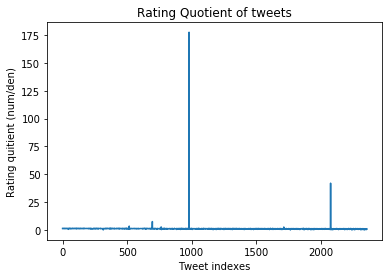

In [43]:
# Defining a new column for the quotient. It is called 'rating'
df1_clean['rating']=df1_clean['rating_numerator']/df1_clean['rating_denominator']
#plotting the ratings in order to find extremely big outliers
plt.plot(df1_clean['rating'])
plt.title('Rating Quotient of tweets')
plt.xlabel('Tweet indexes')
plt.ylabel('Rating quitient (num/den)')

We note that the weird values are greater than 2 or so, then we try values around 2 for delimitind the quotient. By trying and plotting, we conclude that 1.5 is an apropriate value for the delimitation, as we will see in the plot below.

In [44]:
# Convetring ratings greater thatn 1.5 to 1.5 for bounding but keeping the order of ratings
df1_clean['rating']= df1_clean['rating'].apply(lambda r: r if r<1.5 else 1.5)

Text(0,0.5,'Bounded rating')

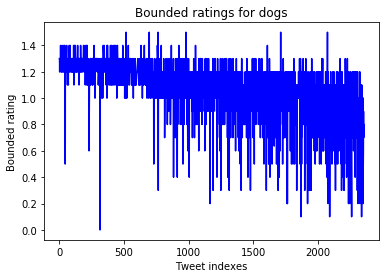

In [45]:
plt.plot(df1_clean['rating'],color='Blue')
plt.title('Bounded ratings for dogs')
plt.xlabel('Tweet indexes')
plt.ylabel('Bounded rating')

The plot above shows quotiens whose comparisons seem reasonable. Now we adjust the numerators, multiplying quitient by denominator, and get the adjusted numerators column.

In [46]:
df1_clean['rating_numerator']=df1_clean['rating']*df1_clean['rating_denominator']

#### Test
For testing, we count values for the numerators count and see that there are not exorbitant values anymore.

In [47]:
df1_clean['rating_numerator'].value_counts()

12.0     486
10.0     436
11.0     413
13.0     287
9.0      153
8.0       98
7.0       52
14.0      38
5.0       34
6.0       32
3.0       19
4.0       16
2.0        9
15.0       5
1.0        5
165.0      1
50.0       1
88.0       1
80.0       1
10.5       1
84.0       1
0.0        1
99.0       1
60.0       1
204.0      1
44.0       1
144.0      1
45.0       1
121.0      1
Name: rating_numerator, dtype: int64

### 8. ------------------------------------------------------------------------------------------
**_The function df1['rating denominator'].describe() makes us notice that the minimum value is zero. But we can not divide by zero!_**

#### Define
We find the rows whith zero denominator, that is, an undetermined rating quotient. If there are few of them, we delete those rows. Otherwise we asses to see how to handle the situation!

#### Code


In [48]:
df1_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Well, it seems that through the first part of the cleaning process, we already took away the zero denominators. Hence, we are done!

#### No test needed!

# Cleaning process (Tidiness)

### 1. -------------------------------------------------------------------------------------------

**Issue: _In the first dataframe, there is one column for each kind fo dog age: doggo, floofer, pupper and puppo. For each item, there is only one choice (if registered) among these four kinds. Therefore, this information should be displayed in one only column._**

#### Define
We create a function which identifies if a row corresponds to one of the categories, in order to create the column 'age'.

#### Code


In [50]:
def f(row):
    val = []
    for x in ['doggo','floofer', 'pupper', 'puppo']:
        if row[x]!= "None":
            val.append(x)
    if val==[]:
        val = 'unknown'
    else:
        val = ", ".join(val)
    return val

df1_clean['age'] = df1_clean.apply(f, axis=1)
print(set(df1_clean['age']))

{'doggo, puppo', 'pupper', 'unknown', 'doggo, floofer', 'doggo, pupper', 'doggo', 'floofer', 'puppo'}


In [51]:
df1_clean['age'].value_counts()

unknown           1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: age, dtype: int64

Note: there are some dogs that have more than one label, however the are statistically irrelevant, so we won't consider them in the following analysis.

#### Test
Now we check that there is a new column 'age' stating the category of the dog, or an 'unknown' string.

In [52]:
df1_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,age
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None,1.3,unknown
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None,1.3,unknown
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,None,None,None,1.2,unknown
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,None,None,None,1.3,unknown
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,None,None,None,1.2,unknown
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10,unknown,None,None,None,None,1.3,unknown
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,None,None,None,None,1.3,unknown
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10,unknown,None,None,None,None,1.3,unknown
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,None,None,None,None,1.3,unknown
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,None,None,None,1.4,doggo


### 2.--------------------------------------------------------------------------------------------

**Issue:_There are two dataframes combining retweets issues. Namely, the first dataframe has the columns ''retweeted tatus id' and 'retweeted status user id', and the the third dataframe has the column 'retweet count'. Moreover, the three datasets are related with the tweets information. Therefore we should have one Master dataset including all the needed information for the analysis._**

#### Define 
The column 'retweeted_status_id' has been already taken away in the cleaning process. However, after working with the whole database for a while we think that the information from the three dataframes has to do with the tweets. Then, it seems appropriate to join all the information in one only dataset. Let us do that.

In [53]:
#Making the tweet_id column be called the same
df3_clean.rename(columns={'tweet id':'tweet_id'}, inplace=True)

In [54]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet count     2354 non-null int64
favorite count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [55]:
# converting the datatype of 'tweet_id' to numeric so that the datatype coincides
# Making an INNER JOIN with second and third dataframes
df3_clean["tweet_id"] = pd.to_numeric(df3_clean["tweet_id"])
df0=df3_clean.merge(df2_clean, how='inner')
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id          2073 non-null int64
retweet count     2073 non-null int64
favorite count    2073 non-null int64
jpg_url           2073 non-null object
img_num           2073 non-null int64
p1                2073 non-null object
p1_conf           2073 non-null float64
p1_dog            2073 non-null bool
p2                2073 non-null object
p2_conf           2073 non-null float64
p2_dog            2073 non-null bool
p3                2073 non-null object
p3_conf           2073 non-null float64
p3_dog            2073 non-null bool
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 200.4+ KB


In [56]:
#Joining the previous dataset with df1
df=df0.merge(df1_clean, how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
retweet count         1971 non-null int64
favorite count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null obje

## We got our Master Dataset!
Let us print our assesed and cleaned dataset 'df'

In [57]:
df.head(10)

,tweet_id,retweet count,favorite count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,age
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,unknown,0.097049,False,unknown,0.085851,...,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None,1.3,unknown
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,unknown,0.090647,...,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None,1.3,unknown
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,unknown,0.078253,...,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,None,None,None,1.2,unknown
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,unknown,0.170278,False,labrador_retriever,0.168086,...,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,None,None,None,1.3,unknown
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,unknown,0.555712,True,unknown,0.225770,...,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,None,None,None,1.2,unknown
5,891087950875897856,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,...,Here we have a majestic great white breaching ...,13.0,10,unknown,None,None,None,None,1.3,unknown
6,890971913173991426,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,unknown,0.341703,True,border_collie,0.199287,...,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,None,None,None,None,1.3,unknown
7,890729181411237888,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,unknown,0.178406,...,When you watch your owner call another dog a g...,13.0,10,unknown,None,None,None,None,1.3,unknown
8,890609185150312448,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,0.193054,...,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,None,None,None,None,1.3,unknown
9,890240255349198849,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,unknown,0.511319,True,unknown,0.451038,...,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,None,None,None,1.4,doggo


In [58]:
df.to_csv('twitter_arch.csv', index = False)

In [59]:
# Downloading the dataset as an Excel file
df.to_excel('we_rate_dogs_tweets_excel.xlsx')

# Insights
We want to produce some analysis in order to answer the following questions:
- Which breeds have the greater average ratings?
- Which age categories have the greater average ratings?
- Which are the most frequent breeds in the tweets for each age (pupper, floofer, etc)?

For the first one, we group by breed and compute the mean. Afterwards we sort by rating:

In [60]:
df[['p1','rating']].groupby('p1').mean().sort_values('rating',ascending=False)

,rating
p1,
saluki,1.250000
briard,1.233333
tibetan_mastiff,1.225000
border_terrier,1.214286
standard_schnauzer,1.200000
gordon_setter,1.175000
irish_setter,1.175000
samoyed,1.170000
golden_retriever,1.156337


![alt text](Insight1.PNG "Title")

- For the second insight, we group by 'age' category, compute the mean and sort.

In [61]:
df[['age','rating']].groupby('age').mean().sort_values('rating',ascending=False).loc[['puppo', 'doggo', 'pupper','floofer']]

,rating
age,
puppo,1.200000
doggo,1.188889
pupper,1.065672
floofer,1.200000


![alt text](Insight2.PNG "Title")

For the third insight, we group by two categories. First by age category, and then by breed. Finally, we count by tweet id's.

In [62]:
df[['p1','age','tweet_id']].groupby(['age','p1']).count()

tweet_id
age            p1                                      
doggo          beagle                                 1
               bedlington_terrier                     2
               border_collie                          1
               borzoi                                 1
               boxer                                  1
               briard                                 1
               chesapeake_bay_retriever               1
               chihuahua                              1
               german_shepherd                        3
               golden_retriever                       9
               great_dane                             1
               irish_setter                           1
               komondor                               1
               labrador_retriever                     5
               norwegian_elkhound                     1
               old_english_sheepdog                   1
               pomeranian                             2
               siberian_husky                         1
               unknown                               28
               whippet                                1
doggo, floofer unknown                                1
doggo, pupper  dalmatian                              2
               golden_retriever                       4
               unknown                                2
doggo, puppo   flat-coated_retriever                  1
floofer        golden_retriever                       1
               pomeranian                             1
               samoyed                                2
               unknown                                3
pupper         american_staffordshire_terrier         2
...                                                 ...
unknown        miniature_pinscher                    18
               miniature_schnauzer                    4
               newfoundland                           4
               norfolk_terrier                        6
               norwegian_elkhound                     5
               norwich_terrier                        3
               old_english_sheepdog                   9
               papillon                               4
               pomeranian                            29
               pug                                   46
               rhodesian_ridgeback                    3
               rottweiler                            14
               saluki                                 4
               samoyed                               34
               schipperke                             8
               scottish_deerhound                     3
               shetland_sheepdog                     15
               siberian_husky                        17
               soft-coated_wheaten_terrier           10
               standard_schnauzer                     1
               sussex_spaniel                         2
               tibetan_mastiff                        3
               tibetan_terrier                        4
               unknown                              878
               vizsla                                12
               weimaraner                             4
               welsh_springer_spaniel                 3
               west_highland_white_terrier           14
               whippet                                7
               yorkshire_terrier                      8

[142 rows x 1 columns]

![alt text](Tabla.PNG "Title")
![alt text](Insight3.PNG "Title")